In [111]:
import pandas as pd
import requests
import re
from bs4 import BeautifulSoup
from textblob import TextBlob
from datetime import datetime, timedelta


In [112]:
#Loading dataset
dataset1 = pd.read_csv(r'C:\Users\DELL LAPTOP\Downloads\LLOY.L (1).csv')
dataset1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,503.139404,503.139404,503.139404,503.139404,188.305161,0.0
1,2000-01-04,471.632294,471.632294,471.632294,471.632294,176.513290,21285517.0
2,2000-01-05,470.982605,470.982605,470.982605,470.982605,176.270126,26030803.0
3,2000-01-06,455.391510,455.391510,455.391510,455.391510,170.435013,43870695.0
4,2000-01-07,439.475494,439.475494,439.475494,439.475494,164.478271,38938371.0


In [113]:
def format_date(date_text):
    if "Yesterday" in date_text:
        return (datetime.now() - timedelta(days=1)).strftime("%d-%m-%Y")
    elif "Today" in date_text:
        return datetime.now().strftime("%d-%m-%Y")
    elif re.match(r'^[A-Za-z]+, [A-Za-z]+\. \d{1,2}, \d{4}$', date_text):
        return datetime.strptime(date_text, "%a, %b. %d, %Y").strftime("%d-%m-%Y")
    elif re.match(r'^[A-Za-z]+, [A-Za-z]+ \d{1,2}, \d{4}$', date_text):  
        return datetime.strptime(date_text, "%a, %b %d, %Y").strftime("%d-%m-%Y")
    elif re.match(r'^[A-Za-z]+, [A-Za-z]+ \d{1,2}, \d{4}$', date_text):  
        return datetime.strptime(date_text, "%a, %b %d, %Y").strftime("%d-%m-%Y")
    elif re.match(r'^[A-Za-z]+, [A-Za-z]+ \d{1,2}$', date_text):  
        date_text = date_text + ", 2023"
        return datetime.strptime(date_text, "%a, %b %d, %Y").strftime("%d-%m-%Y")
    elif re.match(r'^[A-Za-z]+, [A-Za-z]+\. \d{1,2}$', date_text):  
        date_text = date_text + ", 2023"
        return datetime.strptime(date_text, "%a, %b. %d, %Y").strftime("%d-%m-%Y")
    else:
        print("Unrecognized date format:", date_text)
        return None

pg_no = 10
data = {'Title': [], 'Date': [], 'Sentiment Analysis': []}

for i in range(1, pg_no + 1):
    print("----------------------------------------------------------------")
    url_base = "https://seekingalpha.com/symbol/LYG/news?page="
    url = url_base + str(i)
    print("Fetching from page: " + url)
    response = requests.get(url)

    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')

        article_info = soup.find_all('div', class_='grow')
        for info in article_info:
            title_elem = info.find('h3', class_='text-share-text')
            date_elem = info.find('span', class_='whitespace-nowrap sa-circle-divider-share-text-2')

            if title_elem and date_elem:
                title = title_elem.find('a')
                date_text = date_elem.text.strip()
                formatted_date = format_date(date_text)

                if title.text.strip() not in data['Title']:
                    analysis = TextBlob(title.text.strip())
                    polarity = analysis.sentiment.polarity

                    if polarity > 0:
                        sentiment = 'Positive'
                    elif polarity < 0:
                        sentiment = 'Negative'
                    else:
                        sentiment = 'Neutral'

                    data['Title'].append(title.text.strip())
                    data['Date'].append(formatted_date)
                    data['Sentiment Analysis'].append(sentiment)


df = pd.DataFrame(data)
#print(df[['Title', 'Date','Sentiment Analysis']])

----------------------------------------------------------------
Fetching from page: https://seekingalpha.com/symbol/LYG/news?page=1
----------------------------------------------------------------
Fetching from page: https://seekingalpha.com/symbol/LYG/news?page=2
----------------------------------------------------------------
Fetching from page: https://seekingalpha.com/symbol/LYG/news?page=3
----------------------------------------------------------------
Fetching from page: https://seekingalpha.com/symbol/LYG/news?page=4
----------------------------------------------------------------
Fetching from page: https://seekingalpha.com/symbol/LYG/news?page=5
----------------------------------------------------------------
Fetching from page: https://seekingalpha.com/symbol/LYG/news?page=6
----------------------------------------------------------------
Fetching from page: https://seekingalpha.com/symbol/LYG/news?page=7
----------------------------------------------------------------
Fetc

In [114]:
df_set = pd.DataFrame(dataset1)

In [115]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.head()

,Title,Date,Sentiment Analysis
0,"Lloyds maintains FY outlook, posts strong Q3 p...",2023-10-25,Positive
1,U.K. regulators eliminate banker bonus cap in ...,2023-10-24,Neutral
2,Lloyds Bank teams up with BlackRock to offer c...,2023-10-03,Neutral
3,"Lloyds Banking GAAP EPS of 3.90p, revenue of Â...",2023-07-26,Neutral
4,EU regulators to focus on liquidity rules afte...,2023-03-23,Neutral


In [116]:
df_set = df_set.sort_values(by='Date', ascending=False)
df_set.head()

,Date,Open,High,Low,Close,Adj Close,Volume
6095,2023-12-06,0.000000,0.000000,0.000000,45.805000,45.805000,0.0
6094,2023-12-05,44.605000,45.169998,44.595001,45.009998,45.009998,103673064.0
6093,2023-12-04,44.404999,45.185001,44.139999,45.130001,45.130001,187178392.0
6092,2023-12-01,43.660000,44.512001,43.605000,44.490002,44.490002,160245655.0
6091,2023-11-30,43.439999,43.810001,43.070000,43.470001,43.470001,290285051.0


In [117]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df_set['Date'] = pd.to_datetime(df_set['Date'], format='%Y-%m-%d')

grouped_sentiments = df.groupby('Date')['Sentiment Analysis'].agg(lambda x: x.mode().iloc[0]).reset_index()

#merging datasets
merged_df = pd.merge(df_set,grouped_sentiments, on='Date', how='left')

print(merged_df)

           Date        Open        High         Low       Close   Adj Close  \
0    2023-12-06    0.000000    0.000000    0.000000   45.805000   45.805000   
1    2023-12-05   44.605000   45.169998   44.595001   45.009998   45.009998   
2    2023-12-04   44.404999   45.185001   44.139999   45.130001   45.130001   
3    2023-12-01   43.660000   44.512001   43.605000   44.490002   44.490002   
4    2023-11-30   43.439999   43.810001   43.070000   43.470001   43.470001   
...         ...         ...         ...         ...         ...         ...   
6091 2000-01-07  439.475494  439.475494  439.475494  439.475494  164.478271   
6092 2000-01-06  455.391510  455.391510  455.391510  455.391510  170.435013   
6093 2000-01-05  470.982605  470.982605  470.982605  470.982605  176.270126   
6094 2000-01-04  471.632294  471.632294  471.632294  471.632294  176.513290   
6095 2000-01-03  503.139404  503.139404  503.139404  503.139404  188.305161   

           Volume Sentiment Analysis  
0           

In [118]:
merged_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Sentiment Analysis
0,2023-12-06,0.000000,0.000000,0.000000,45.805000,45.805000,0.0,NaN
1,2023-12-05,44.605000,45.169998,44.595001,45.009998,45.009998,103673064.0,NaN
2,2023-12-04,44.404999,45.185001,44.139999,45.130001,45.130001,187178392.0,NaN
3,2023-12-01,43.660000,44.512001,43.605000,44.490002,44.490002,160245655.0,NaN
4,2023-11-30,43.439999,43.810001,43.070000,43.470001,43.470001,290285051.0,NaN


In [119]:
#preprocessing stage
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler().fit(merged_df.iloc[:, 4:5].astype('float32'))
df_log = minmax.transform(merged_df.iloc[:, 4:5].astype('float32'))
df_log = pd.DataFrame(df_log)

df_log.head()
merged_df['Scaled_Close'] = df_log
merged_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Sentiment Analysis,Scaled_Close
0,2023-12-06,0.000000,0.000000,0.000000,45.805000,45.805000,0.0,NaN,0.047091
1,2023-12-05,44.605000,45.169998,44.595001,45.009998,45.009998,103673064.0,NaN,0.045529
2,2023-12-04,44.404999,45.185001,44.139999,45.130001,45.130001,187178392.0,NaN,0.045765
3,2023-12-01,43.660000,44.512001,43.605000,44.490002,44.490002,160245655.0,NaN,0.044507
4,2023-11-30,43.439999,43.810001,43.070000,43.470001,43.470001,290285051.0,NaN,0.042503


In [120]:
sentiment_mapping = {'Negative': -1, 'Neutral': 0, 'Positive': 1}
merged_df['Sentiment_Encoded'] = merged_df['Sentiment Analysis'].map(sentiment_mapping)

merged_df.drop('Sentiment Analysis', axis=1, inplace=True)


print(merged_df.head())


#OpeHigh	Low	Close	Adj Close	Volume	Sentiment Analysis	Scaled_Close


#features = ['Open', 'High', 'Low', 'Volume','']
#target = ['Close']

        Date       Open       High        Low      Close  Adj Close  \
0 2023-12-06   0.000000   0.000000   0.000000  45.805000  45.805000   
1 2023-12-05  44.605000  45.169998  44.595001  45.009998  45.009998   
2 2023-12-04  44.404999  45.185001  44.139999  45.130001  45.130001   
3 2023-12-01  43.660000  44.512001  43.605000  44.490002  44.490002   
4 2023-11-30  43.439999  43.810001  43.070000  43.470001  43.470001   

        Volume  Scaled_Close  Sentiment_Encoded  
0          0.0      0.047091                NaN  
1  103673064.0      0.045529                NaN  
2  187178392.0      0.045765                NaN  
3  160245655.0      0.044507                NaN  
4  290285051.0      0.042503                NaN  


In [121]:
merged_df.dropna(inplace=True)
merged_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Scaled_Close,Sentiment_Encoded
30,2023-10-25,40.880001,41.650002,39.537998,41.459999,41.459999,294434604.0,0.038553,1.0
31,2023-10-24,40.000000,40.933998,39.419998,40.575001,40.575001,154084778.0,0.036814,0.0
46,2023-10-03,43.035000,43.500000,42.674999,42.814999,42.814999,77914964.0,0.041216,0.0
94,2023-07-26,44.259998,45.459999,43.705002,45.330002,44.365978,313097530.0,0.046158,0.0
178,2023-03-23,47.610001,48.119999,46.849998,46.849998,44.382805,238689623.0,0.049144,0.0


In [122]:
#features = ['Open', 'High', 'Low', 'Volume','Sentiment_Encoded']
#target = ['Scaled_Close']
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = merged_df[['Open', 'High', 'Low', 'Volume', 'Sentiment_Encoded']].values
y = merged_df['Scaled_Close'].values


#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


scaler = StandardScaler()

X_train1 = scaler.fit_transform(X_train)
X_test1 = scaler.transform(X_test)

Epoch 1/10
9/9 [==============================] - 1s 26ms/step - loss: 0.0066 - val_loss: 0.0034
Epoch 2/10
9/9 [==============================] - 0s 7ms/step - loss: 0.0022 - val_loss: 0.0011
Epoch 3/10
9/9 [==============================] - 0s 5ms/step - loss: 0.0012 - val_loss: 4.5424e-04
Epoch 4/10
9/9 [==============================] - 0s 6ms/step - loss: 4.5993e-04 - val_loss: 2.4812e-04
Epoch 5/10
9/9 [==============================] - 0s 6ms/step - loss: 1.8802e-04 - val_loss: 1.6860e-04
Epoch 6/10
9/9 [==============================] - 0s 6ms/step - loss: 1.1729e-04 - val_loss: 1.1362e-04
Epoch 7/10
9/9 [==============================] - 0s 5ms/step - loss: 7.9522e-05 - val_loss: 6.8945e-05
Epoch 8/10
9/9 [==============================] - 0s 6ms/step - loss: 5.6071e-05 - val_loss: 5.7351e-05
Epoch 9/10
9/9 [==============================] - 0s 6ms/step - loss: 4.4437e-05 - val_loss: 4.4749e-05
Epoch 10/10
2/2 [==============================] - 0s 0s/step - loss: 3.7100e-05
Me

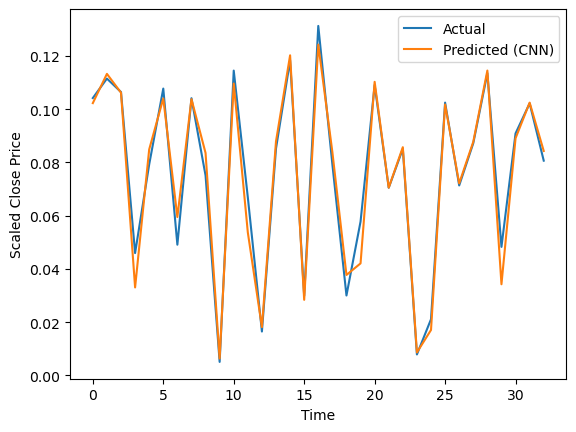

Root Mean Squared Error: 0.006090984214097261


In [123]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Conv1D,MaxPooling1D,Flatten,Dense,LSTM,SimpleRNN



X_train = X_train1.reshape(X_train1.shape[0], X_train1.shape[1], 1)
X_test = X_test1.reshape(X_test1.shape[0], X_test1.shape[1], 1)

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))


model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


loss = model.evaluate(X_test, y_test)
print(f'Mean Squared Error on Test Data: {loss}')


predictions = model.predict(X_test)


plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted (CNN)')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Scaled Close Price')
plt.show()


cnn_mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(cnn_mse)
print(f'Root Mean Squared Error: {rmse}')

Epoch 1/10
9/9 [==============================] - 1s 43ms/step - loss: 0.0202 - val_loss: 0.0058
Epoch 2/10
9/9 [==============================] - 0s 9ms/step - loss: 0.0084 - val_loss: 0.0041
Epoch 3/10
9/9 [==============================] - 0s 6ms/step - loss: 0.0042 - val_loss: 0.0024
Epoch 4/10
9/9 [==============================] - 0s 5ms/step - loss: 0.0031 - val_loss: 0.0023
Epoch 5/10
9/9 [==============================] - 0s 6ms/step - loss: 0.0023 - val_loss: 0.0020
Epoch 6/10
9/9 [==============================] - 0s 5ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 7/10
9/9 [==============================] - 0s 7ms/step - loss: 0.0013 - val_loss: 9.5972e-04
Epoch 8/10
9/9 [==============================] - 0s 5ms/step - loss: 9.4676e-04 - val_loss: 8.8412e-04
Epoch 9/10
9/9 [==============================] - 0s 6ms/step - loss: 7.9743e-04 - val_loss: 7.3549e-04
Epoch 10/10
2/2 [==============================] - 0s 16ms/step


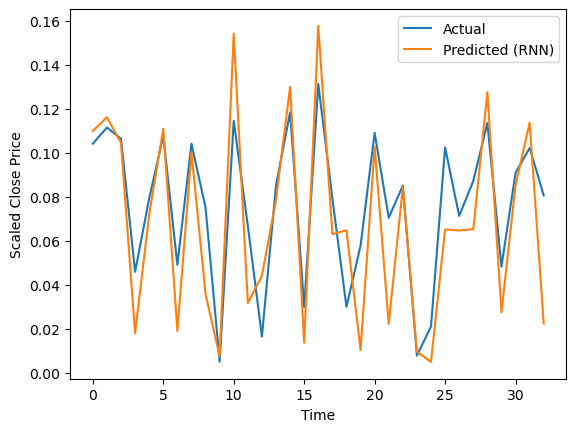

RNN Root Mean Squared Error: 0.024944957345724106


In [124]:
X_train_rnn = X_train1.reshape(X_train1.shape[0], 1, X_train1.shape[1])
X_test_rnn = X_test1.reshape(X_test1.shape[0], 1, X_test1.shape[1])


model_rnn = Sequential()
model_rnn.add(SimpleRNN(50, activation='relu', input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
model_rnn.add(Dense(1))
model_rnn.compile(optimizer='adam', loss='mean_squared_error')


model_rnn.fit(X_train_rnn, y_train, epochs=10, batch_size=32, validation_data=(X_test_rnn, y_test))


predictions_rnn = model_rnn.predict(X_test_rnn)


plt.plot(y_test, label='Actual')
plt.plot(predictions_rnn, label='Predicted (RNN)')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Scaled Close Price')
plt.show()


rnn_mse = mean_squared_error(y_test, predictions_rnn)
rmse_rnn = np.sqrt(rnn_mse)
print(f'RNN Root Mean Squared Error: {rmse_rnn}')

Epoch 1/10
9/9 [==============================] - 2s 46ms/step - loss: 0.0045 - val_loss: 0.0014
Epoch 2/10
9/9 [==============================] - 0s 9ms/step - loss: 0.0011 - val_loss: 5.9360e-04
Epoch 3/10
9/9 [==============================] - 0s 8ms/step - loss: 7.4094e-04 - val_loss: 2.8494e-04
Epoch 4/10
9/9 [==============================] - 0s 9ms/step - loss: 4.2249e-04 - val_loss: 3.5174e-04
Epoch 5/10
9/9 [==============================] - 0s 9ms/step - loss: 2.7327e-04 - val_loss: 1.0032e-04
Epoch 6/10
9/9 [==============================] - 0s 10ms/step - loss: 1.5187e-04 - val_loss: 5.3736e-05
Epoch 7/10
9/9 [==============================] - 0s 10ms/step - loss: 8.6875e-05 - val_loss: 4.2164e-05
Epoch 8/10
9/9 [==============================] - 0s 7ms/step - loss: 6.4301e-05 - val_loss: 2.7369e-05
Epoch 9/10
9/9 [==============================] - 0s 7ms/step - loss: 4.4642e-05 - val_loss: 2.1851e-05
Epoch 10/10
2/2 [==============================] - 0s 12ms/step


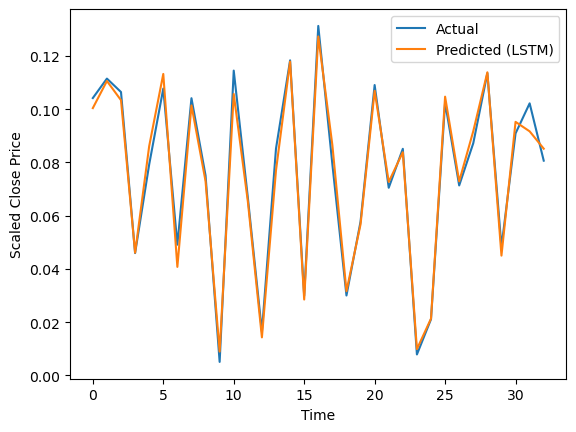

LSTM Root Mean Squared Error: 0.004358578007668257


In [125]:
X_train_lstm = X_train1.reshape(X_train1.shape[0], X_train1.shape[1], 1)
X_test_lstm = X_test1.reshape(X_test1.shape[0], X_test1.shape[1], 1)


model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')


model_lstm.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_data=(X_test_lstm, y_test))


predictions_lstm = model_lstm.predict(X_test_lstm)


plt.plot(y_test, label='Actual')
plt.plot(predictions_lstm, label='Predicted (LSTM)')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Scaled Close Price')
plt.show()


lstm_mse = mean_squared_error(y_test, predictions_lstm)
rmse_lstm = np.sqrt(lstm_mse)
print(f'LSTM Root Mean Squared Error: {rmse_lstm}')

In [126]:

#mse 
print('CNN Model MSE  :',cnn_mse)
print('RNN Model MSE  :',rnn_mse)
print('LSTM Model MSE :',lstm_mse)


CNN Model MSE  : 3.7100086e-05
RNN Model MSE  : 0.0006222509
LSTM Model MSE : 1.8997203e-05


In [127]:

# Reshape the data  of the last 5 days
sequence_length = 5
X_train_lstm = np.array([X_train_lstm[i - sequence_length:i] for i in range(sequence_length, len(X_train_lstm))])
y_train_lstm = np.array([y_train[i] for i in range(sequence_length, len(y_train))])

X_test_lstm = np.array([X_test_lstm[i - sequence_length:i] for i in range(sequence_length, len(X_test_lstm))])
y_test_lstm = np.array([y_test[i] for i in range(sequence_length, len(y_test))])

# LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(sequence_length, X_train_lstm.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model_lstm.fit(X_train_lstm, y_train_lstm, epochs=10, batch_size=32, validation_data=(X_test_lstm, y_test_lstm))

# Predict the closing price of today using the last 5 days' features
today_features = X_test_lstm[-1].reshape(1, sequence_length, X_test_lstm.shape[2])
predicted_today = model_lstm.predict(today_features)

# Print the predicted value
print(f'Predicted Closing Price for Today: {predicted_today[0, 0]}')

Epoch 1/10
9/9 [==============================] - 2s 53ms/step - loss: 0.0026 - val_loss: 0.0016
Epoch 2/10
9/9 [==============================] - 0s 7ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 3/10
9/9 [==============================] - 0s 8ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 4/10
9/9 [==============================] - 0s 8ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 5/10
9/9 [==============================] - 0s 8ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 6/10
9/9 [==============================] - 0s 8ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 7/10
9/9 [==============================] - 0s 8ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 8/10
9/9 [==============================] - 0s 9ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 9/10
9/9 [==============================] - 0s 8ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 10/10
1/1 [==============================] - 0s 238ms/step
Predicted Closing Price for Today: 0.044135499745607376


In [128]:

predicted_today_unscaled = minmax.inverse_transform(predicted_today)

# today closing price
print(f'Unscaled Predicted Closing Price for Today: {predicted_today_unscaled[0, 0]}')


Unscaled Predicted Closing Price for Today: 44.300941467285156
